<a href="https://colab.research.google.com/github/You2499/IST707/blob/main/Copy_of_week3_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

## Basic Error Metrics

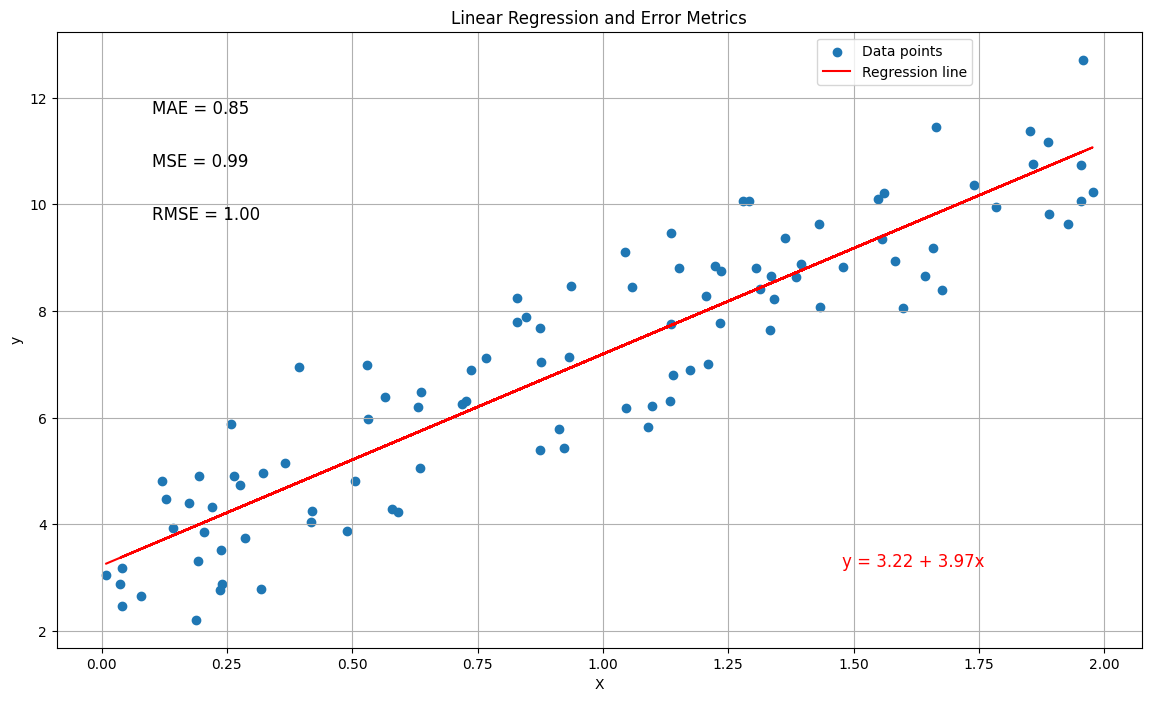

('y = 3.22 + 3.97x', 0.849258198323929, 0.9924386487246483, 0.9962121504602562)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for linear regression
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 3 + 4 * X + np.random.randn(100, 1)

# Perform linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

# Calculate the regression equation
slope = lin_reg.coef_[0][0]
intercept = lin_reg.intercept_[0]
regression_eq = f"y = {intercept:.2f} + {slope:.2f}x"

# Calculate MAE, MSE, RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = sqrt(mse)

# Create the plot
plt.figure(figsize=(14, 8))
plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')

# Annotate MAE, MSE, RMSE
plt.annotate(f"MAE = {mae:.2f}", xy=(0.1, y.max() - 1), fontsize=12)
plt.annotate(f"MSE = {mse:.2f}", xy=(0.1, y.max() - 2), fontsize=12)
plt.annotate(f"RMSE = {rmse:.2f}", xy=(0.1, y.max() - 3), fontsize=12)

# Annotate the regression equation
plt.annotate(regression_eq, xy=(X.max() - 0.5, y.min() + 1), fontsize=12, color='red')

plt.title('Linear Regression and Error Metrics')
plt.legend(bbox_to_anchor=(.85, 1))
plt.grid(True)
plt.show()

regression_eq, mae, mse, rmse

## R^2 and Adjusted R^2

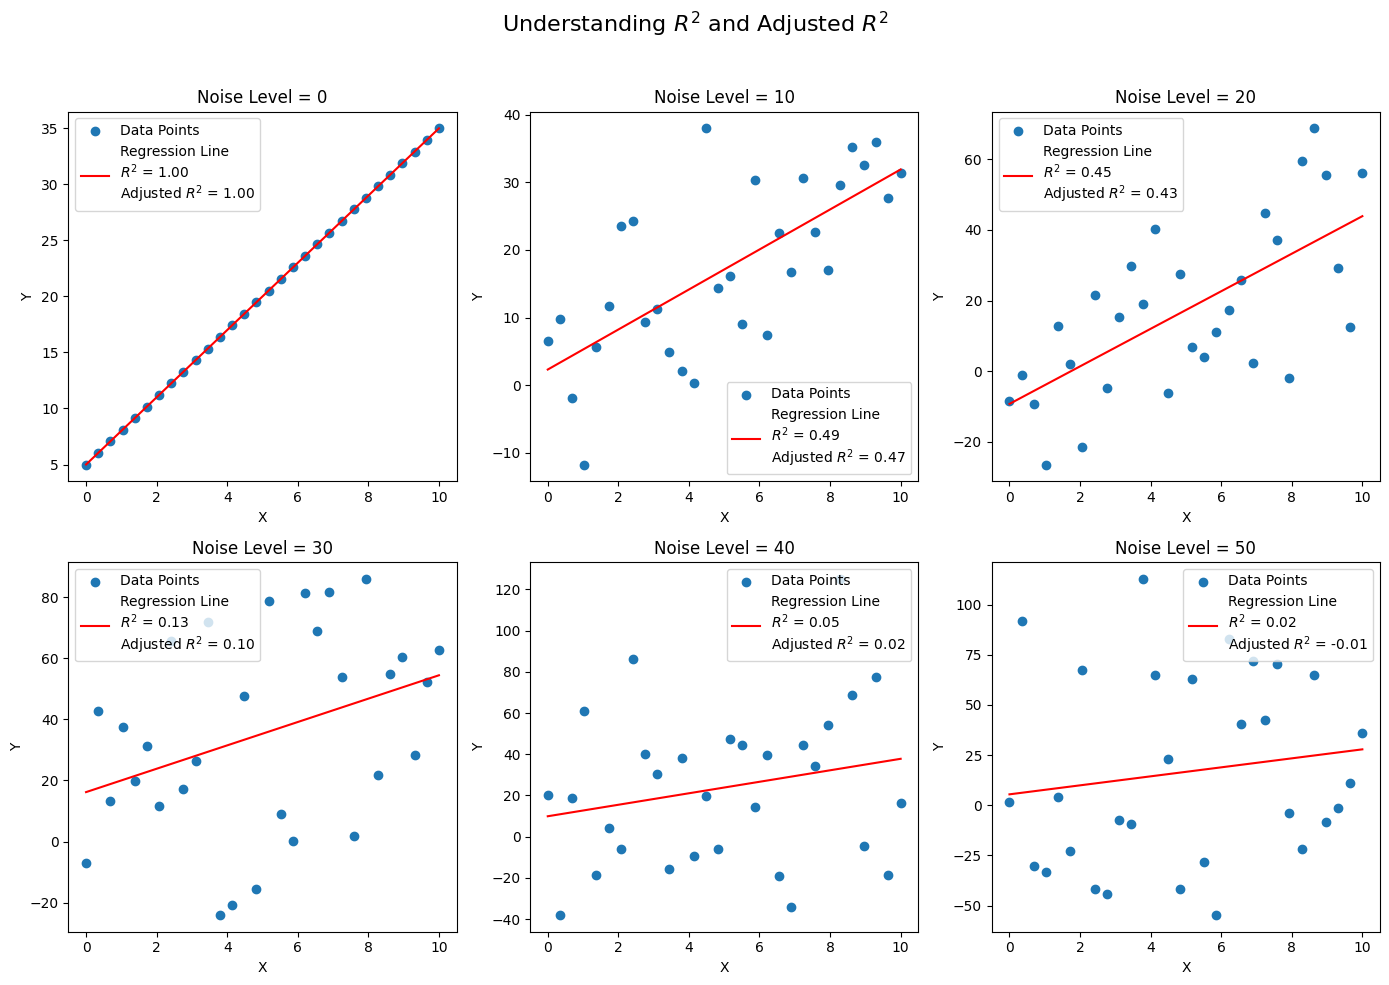

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Function to calculate Adjusted R-squared
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Data generation
np.random.seed(0)
x = np.linspace(0, 10, 30)
y_perfect = 3 * x + 5

# Noise levels
noise_levels = [0, 10, 20, 30, 40, 50]

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(14, 10))
fig.suptitle("Understanding $R^2$ and Adjusted $R^2$", fontsize=16)

# Loop through subplots to create different noise levels
for i, noise_level in enumerate(noise_levels):
    row = i // 3
    col = i % 3
    y = y_perfect + np.random.normal(0, noise_level, len(x))

    # Linear Regression
    x_reshaped = x.reshape(-1, 1)
    reg = LinearRegression().fit(x_reshaped, y)
    y_pred = reg.predict(x_reshaped)

    # Metrics
    r2 = r2_score(y, y_pred)
    adj_r2 = adjusted_r2(r2, len(y), 1)

    # Plotting
    axs[row,col].scatter(x, y, label='Data Points')
    axs[row,col].plot(x, y_pred, color='r', label=f"Regression Line\n$R^2$ = {r2:.2f}\nAdjusted $R^2$ = {adj_r2:.2f}")
    axs[row,col].set_title(f"Noise Level = {noise_level}")
    axs[row,col].set_xlabel("X")
    axs[row,col].set_ylabel("Y")
    axs[row,col].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## AIC, BIC, and R^2

In [ ]:
# Only run this if you need to install statsmodels
!pip install statsmodels

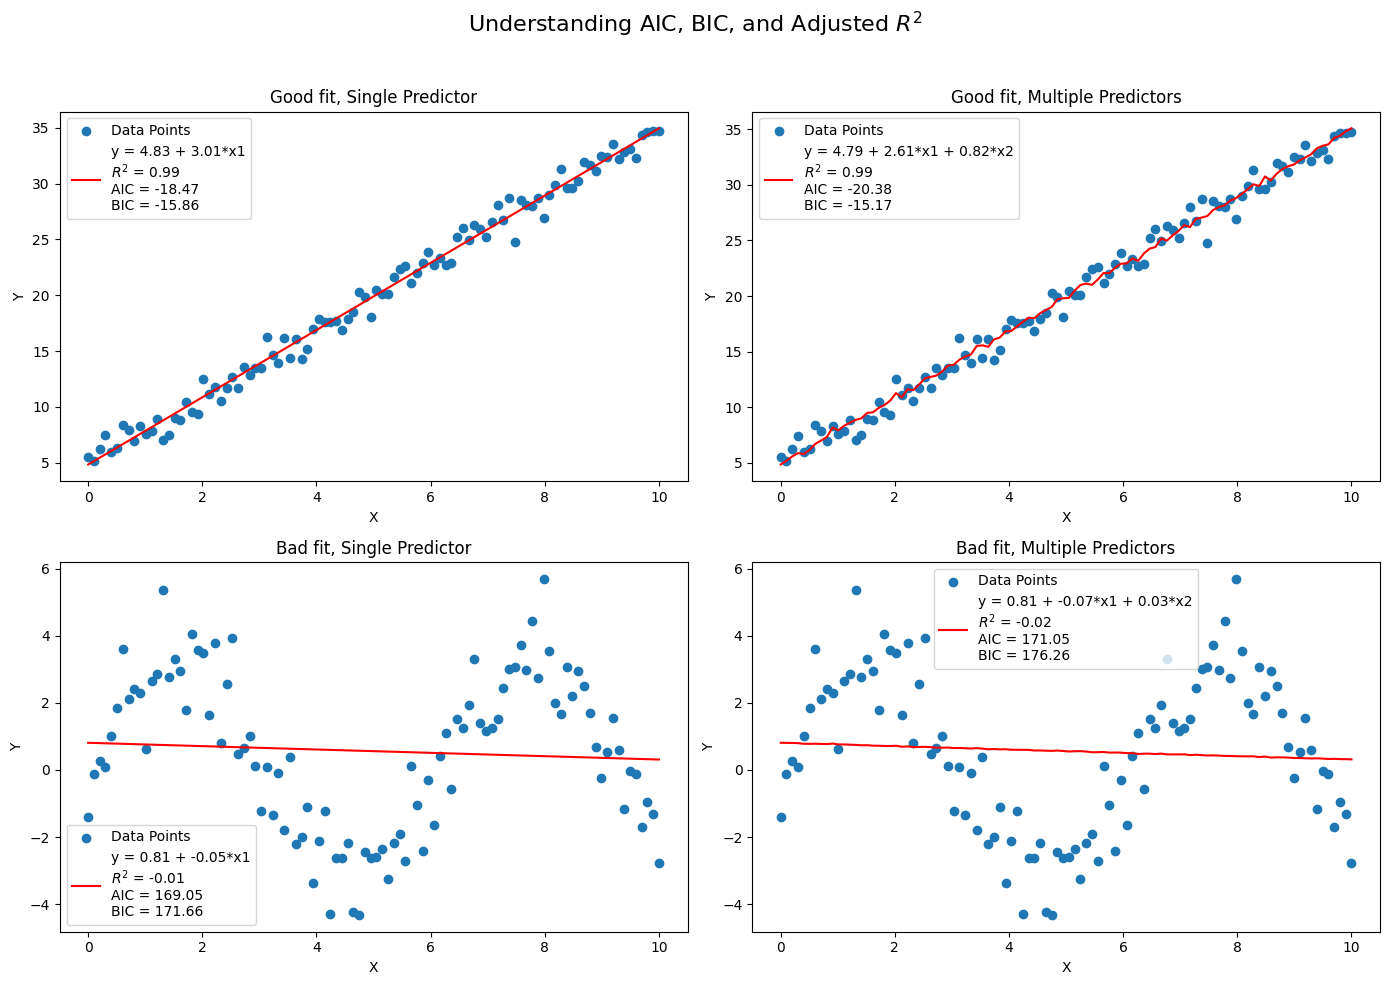

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Data generation
np.random.seed(42)
x = np.linspace(0, 10, 100)
y_good_fit = 3 * x + 5 + np.random.normal(0, 1, len(x))
y_bad_fit = 3 * np.sin(x) + np.random.normal(0, 1, len(x))

# Extra feature for multiple predictor scenario
x_extra = 0.5 * x + 0.2 * np.random.normal(0, 1, len(x))

# Function to calculate AIC and BIC
def calc_aic_bic(y, y_pred, p):
    resid = y - y_pred
    sse = sum(resid**2)
    n = len(y)
    aic = n * np.log(sse/n) + 2*p
    bic = n * np.log(sse/n) + np.log(n)*p
    return aic, bic

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Understanding AIC, BIC, and Adjusted $R^2$", fontsize=16)

# Scenarios: ["Good fit, Single Predictor", "Good fit, Multiple Predictors", "Bad fit, Single Predictor", "Bad fit, Multiple Predictors"]
scenarios = [(y_good_fit, x.reshape(-1, 1), 'Good fit, Single Predictor'),
             (y_good_fit, np.column_stack((x, x_extra)), 'Good fit, Multiple Predictors'),
             (y_bad_fit, x.reshape(-1, 1), 'Bad fit, Single Predictor'),
             (y_bad_fit, np.column_stack((x, x_extra)), 'Bad fit, Multiple Predictors')]

# Loop through subplots to create different scenarios
for i, (y, X, title) in enumerate(scenarios):
    ax = axs.flatten()[i]
    model = sm.OLS(y, sm.add_constant(X)).fit()
    y_pred = model.predict(sm.add_constant(X))

    # Coefficients for the regression formula
    coeffs = model.params
    formula = f"y = {coeffs[0]:.2f}"
    for j in range(1, len(coeffs)):
        formula += f" + {coeffs[j]:.2f}*x{j}"

    # Calculate R-squared, AIC, BIC
    r2 = model.rsquared_adj
    aic, bic = calc_aic_bic(y, y_pred, model.df_model)

    # Plotting
    ax.scatter(x, y, label='Data Points')
    ax.plot(x, y_pred, color='r', label=f"{formula}\n$R^2$ = {r2:.2f}\nAIC = {aic:.2f}\nBIC = {bic:.2f}")

    #ax.plot(x, y_pred, color='r', label=f"Regression Line\n$R^2$ = {r2:.2f}\nAIC = {aic:.2f}\nBIC = {bic:.2f}")
    ax.set_title(title)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Examining Significance

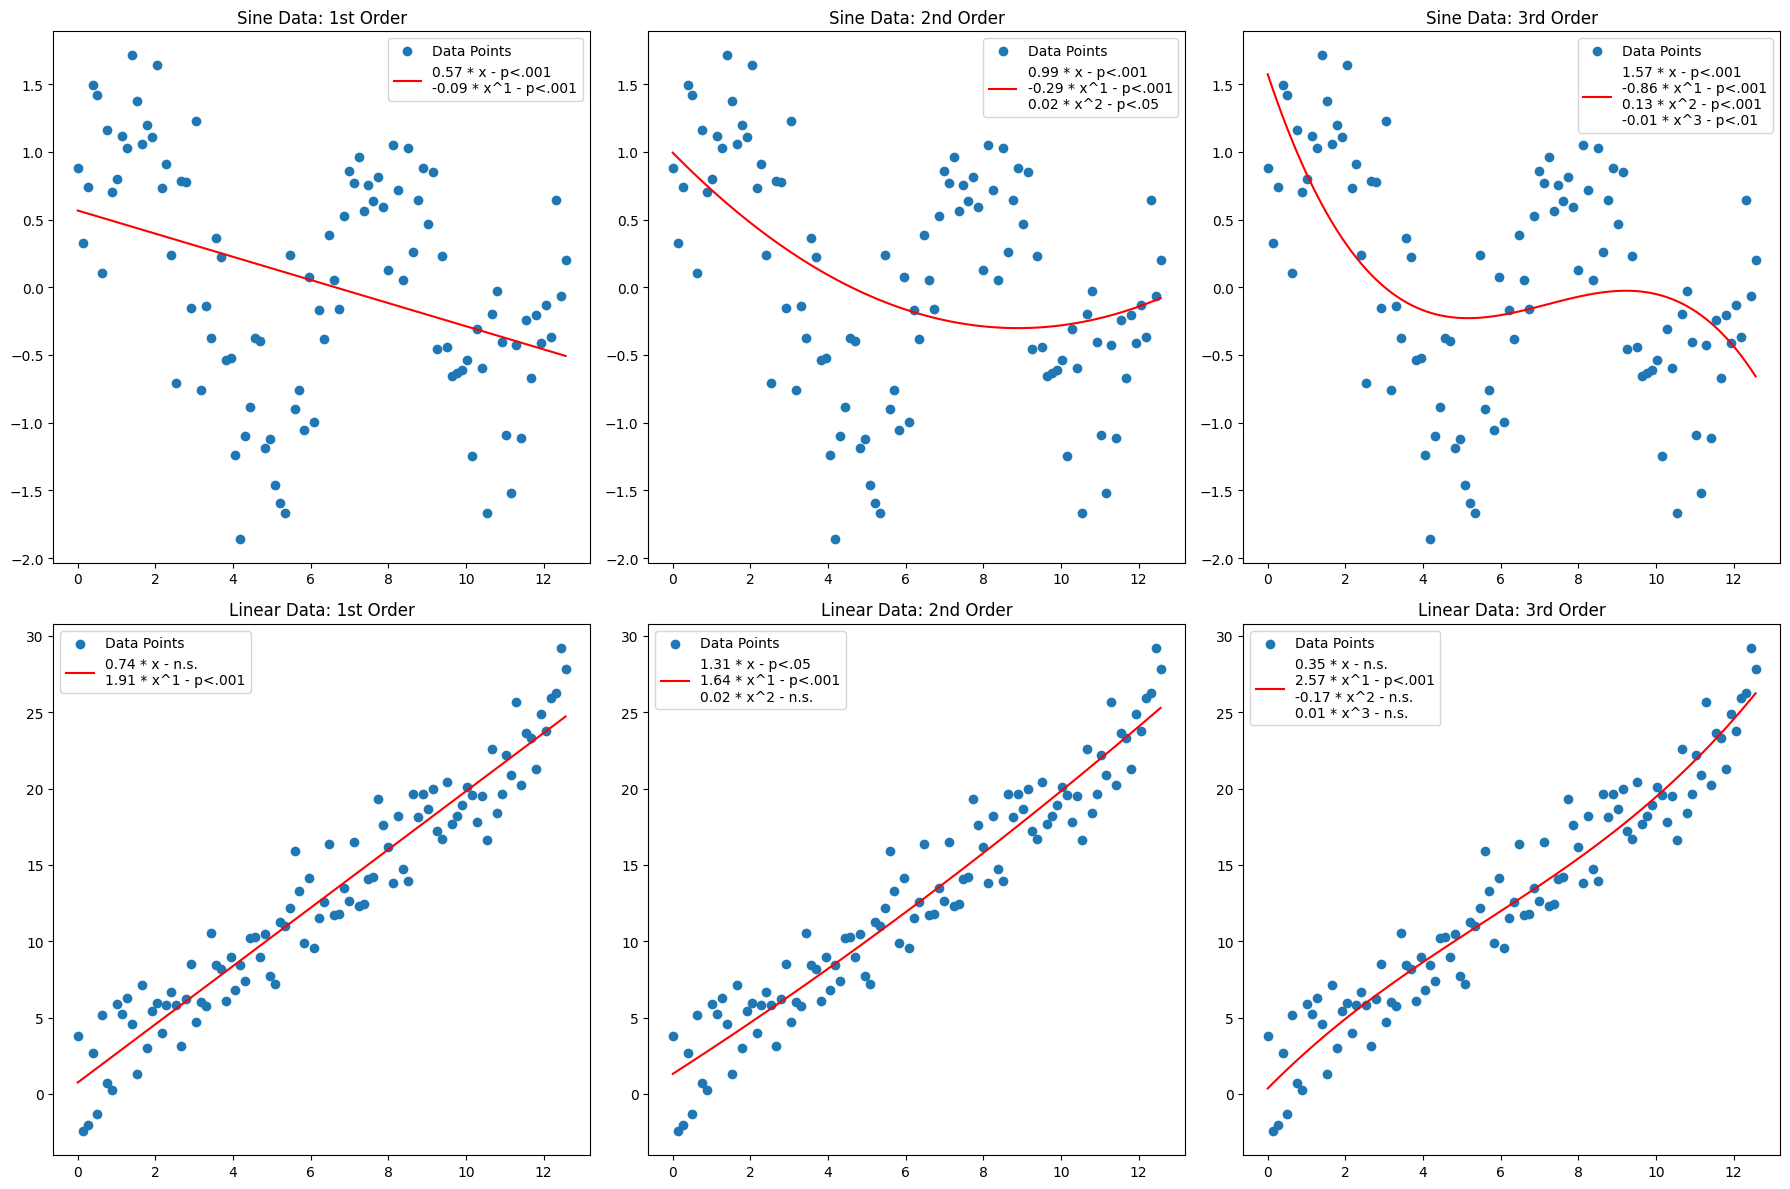

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Function to fit polynomial and return p-values
def fit_and_get_coeffs(x, y, degree):
    x_poly = np.column_stack([x**i for i in range(degree + 1)])
    model = sm.OLS(y, x_poly).fit()
    return model.params, model.pvalues
    print(model.params)
    return model.pvalues[-1]

def format_legend_text(coefficients, p_values):
    formatted_text = []
    for i, (coef, p_value) in enumerate(zip(coefficients, p_values)):
        # Convert p-value to conventional scientific notation
        if p_value >= 0.05:
            p_text = "n.s."
        elif p_value < 0.05 and p_value >= 0.01:
            p_text = "p<.05"
        elif p_value < 0.01 and p_value >= 0.001:
            p_text = "p<.01"
        else:
            p_text = "p<.001"

        # Format coefficient and power of x
        coef_text = f"{coef:.2f} * x"
        if i > 0:
            coef_text += f"^{i}"

        # Combine to create legend text
        formatted_text.append(f"{coef_text} - {p_text}")

    return formatted_text

# Seed for reproducibility
np.random.seed(0)

# Data generation parameters
n_points = 100
x = np.linspace(0, 4 * np.pi, n_points)

# Generate data using sine function
y_sine = np.sin(x) + np.random.normal(0, 0.5, n_points)

# Generate data using a linear function
y_linear = 2 * x + np.random.normal(0, 2, n_points)

# Create plots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Titles
titles = ['1st Order', '2nd Order', '3rd Order']

# Loop through to create polynomial fits
for i in range(3):
    # Fit polynomial for sine data
    p_sine = np.polyfit(x, y_sine, i + 1)
    y_sine_fit = np.polyval(p_sine, x)
    coeffs, pvalues = fit_and_get_coeffs(x, y_sine, i + 1)
    p_value_sine = "\n".join(format_legend_text(coeffs,pvalues))

    # Fit polynomial for linear data
    p_linear = np.polyfit(x, y_linear, i + 1)
    y_linear_fit = np.polyval(p_linear, x)
    coeffs, pvalues = fit_and_get_coeffs(x, y_linear, i + 1)
    p_value_linear = "\n".join(format_legend_text(coeffs,pvalues))

    # Plotting for sine data
    axs[0, i].scatter(x, y_sine, label='Data Points')
    axs[0, i].plot(x, y_sine_fit, 'r', label=f'{p_value_sine}')
    axs[0, i].set_title(f'Sine Data: {titles[i]}')
    axs[0, i].legend()

    # Plotting for linear data
    axs[1, i].scatter(x, y_linear, label='Data Points')
    axs[1, i].plot(x, y_linear_fit, 'r', label=f'{p_value_linear}')
    axs[1, i].set_title(f'Linear Data: {titles[i]}')
    axs[1, i].legend()

plt.tight_layout()
plt.show()

## Student's T-distribution

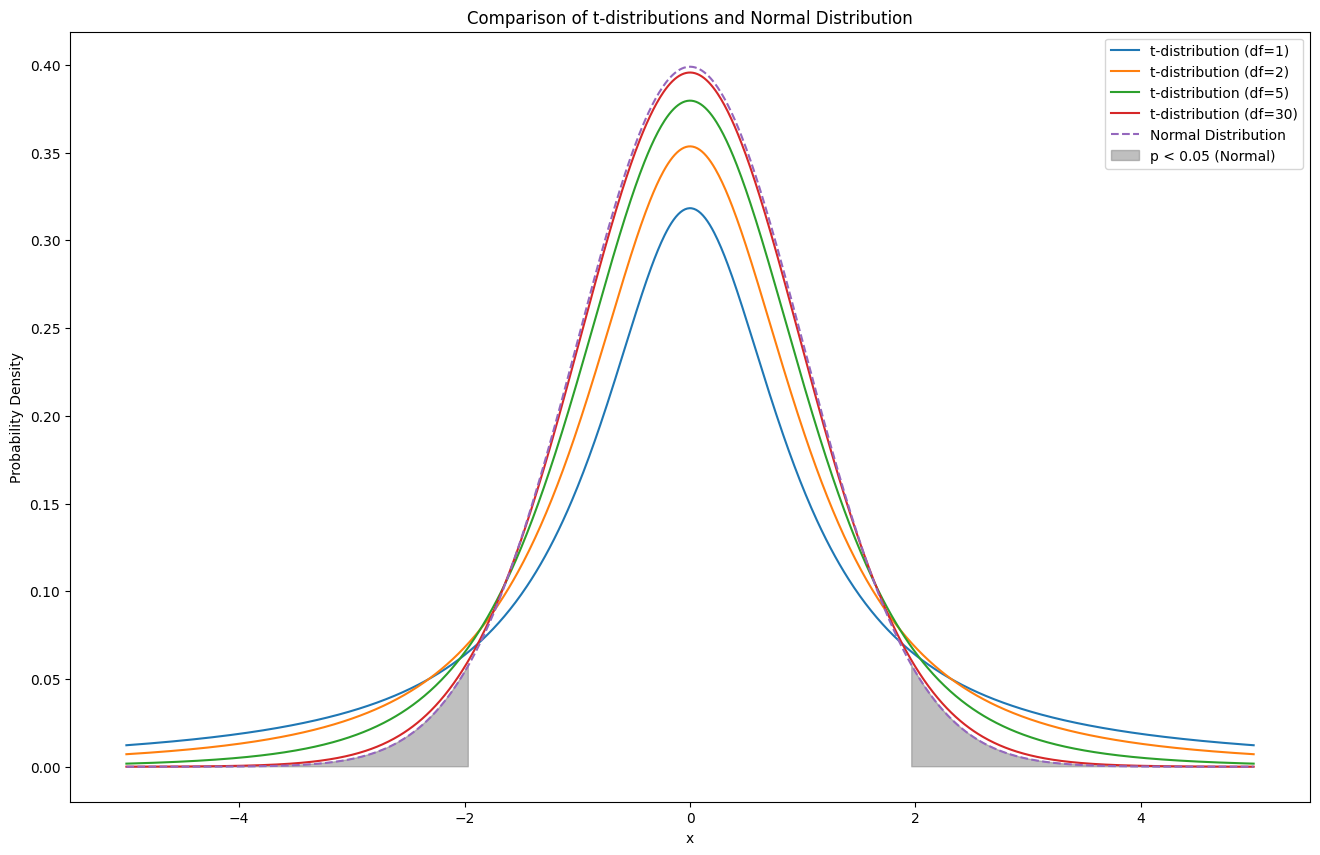

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t, norm

# Generate data points
x = np.linspace(-5, 5, 1000)
plt.figure(figsize=(16, 10))
# Generate t-distributions for different degrees of freedom
for df in [1, 2, 5, 30]:
    y_t = t.pdf(x, df=df)
    plt.plot(x, y_t, label=f't-distribution (df={df})')

# Generate normal distribution
y_norm = norm.pdf(x, 0, 1)

plt.plot(x, y_norm, label='Normal Distribution', linestyle='--')

# Mark the tails for p < 0.05 in the normal distribution
critical_value_05 = norm.ppf(1 - 0.025)
plt.fill_between(x, y_norm, where=(x <= -critical_value_05) | (x >= critical_value_05), color='gray', alpha=0.5, label='p < 0.05 (Normal)')

# Labels and title
plt.title('Comparison of t-distributions and Normal Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()

plt.show()

## ROC Curves and AUC

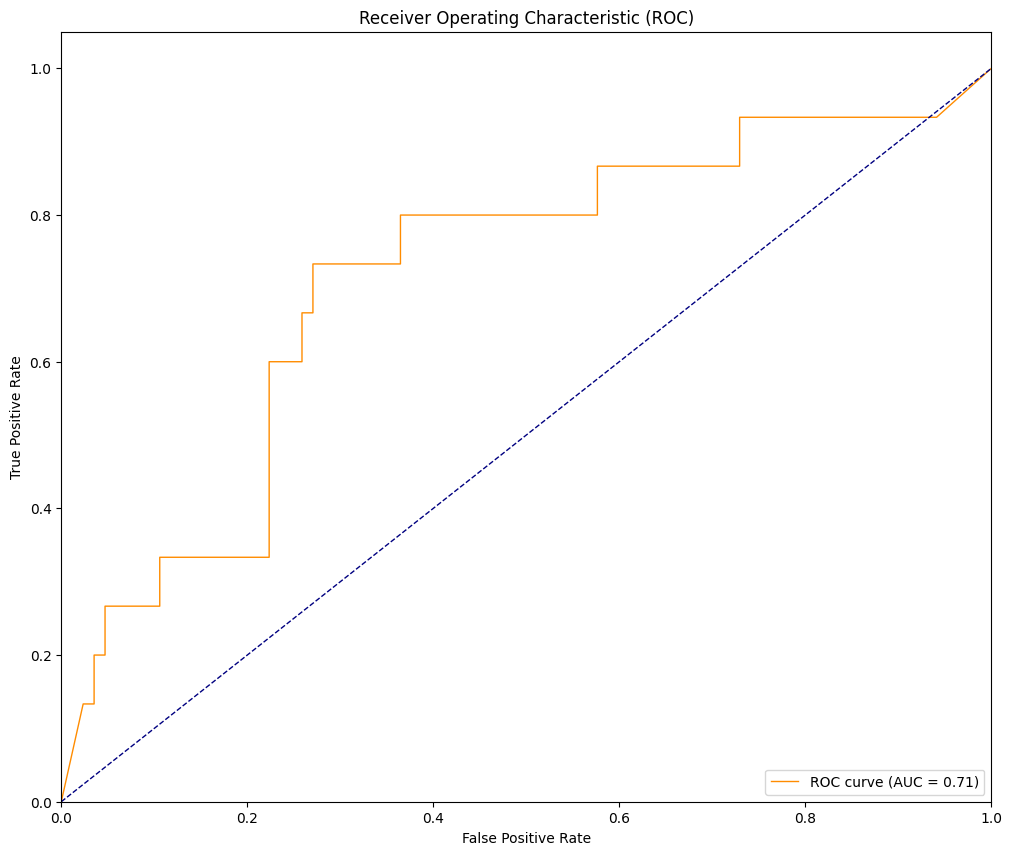

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data
np.random.seed(0)
n_samples = 100

# Generate true labels (40% of them are positive)
y_true = np.random.choice([0, 1], size=n_samples, p=[0.8, 0.2])

# Generate predicted probabilities
y_score = np.linspace(0, 1, n_samples)
np.random.shuffle(y_score)

# Introduce some noise to make it more realistic
y_score = y_score + np.random.normal(0, 0.1, n_samples)
y_score = np.clip(y_score, 0, 1)

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_true, y_score)
roc_auc = roc_auc_score(y_true, y_score)

# Plot the ROC curve
plt.figure(figsize=(12,10))
plt.plot(fpr, tpr, color='darkorange', lw=1, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Exercise 1

1. Heteroscedasticity refers to data where variance is not the same across the data. How does this influence your statistics?  
    1. Generate some linear data with noise that increases as a function of x, and another with noise that is constant throughout the range of values.
    2. Calculate Adj. R^2, AIC, BIC, and p-values for your coeffients.
    3. How does the noise influence your outcomes?  
    4. Can you find a setting where the two curves have roughly the same measures, even though the types of noise varies?
    5. What does this tell you?

In [ ]:
import numpy as np
import statsmodels.api as sm

# Seed for reproducibility
np.random.seed(42)

# Generate data
x = np.linspace(0, 10, 100)

# Heteroscedastic noise
y_hetero = 3 * x + 5 + np.random.normal(0, 0.1 * x, len(x))

# Homoscedastic noise
y_homo = 3 * x + 5 + np.random.normal(0, 1, len(x))

# Calculate metrics
def calc_metrics(y, X):
    model = sm.OLS(y, sm.add_constant(X)).fit()
    r2_adj = model.rsquared_adj
    aic = model.aic
    bic = model.bic
    p_values = model.pvalues
    return r2_adj, aic, bic, p_values

# Metrics for heteroscedastic data
r2_hetero, aic_hetero, bic_hetero, p_hetero = calc_metrics(y_hetero, x)
print(f'Heteroscedastic Data: R2_adj = {r2_hetero}, AIC = {aic_hetero}, BIC = {bic_hetero}, p-values = {p_hetero}')

# Metrics for homoscedastic data
r2_homo, aic_homo, bic_homo, p_homo = calc_metrics(y_homo, x)
print(f'Homoscedastic Data: R2_adj = {r2_homo}, AIC = {aic_homo}, BIC = {bic_homo}, p-values = {p_homo}')



Heteroscedastic Data: R2_adj = 0.9967244883483879, AIC = 148.81770822077394, BIC = 154.0280485927501, p-values = [3.94562556e-071 8.68043935e-124]
Homoscedastic Data: R2_adj = 0.9882667597923886, AIC = 277.2910988248185, BIC = 282.5014391967947, p-values = [2.93718174e-46 1.23919113e-96]


### 3. How does the noise influence your outcomes?

In statistics, the assumption of homoscedasticity (constant variance across the range of the independent variable) is critical for linear regression models. In the case of heteroscedastic noise, the estimated standard errors of the coefficients can be biased. This in turn affects the confidence leading to incorrect conclusions. In the above readings, heteroscedastic data showed better or comparable R^2, AIC, and BIC values.

### 4. Can you find a setting where the two curves have roughly the same measures, even though the types of noise vary?

Yes, it's possible to find settings where the two curves yield similar R^2, AIC, and BIC measures despite differing noise structures. This could happen if the heteroscedastic noise isn't severe enough to significantly bias the. Additionally, the sample size could also play an important role, with a large enough sample, the impact of heteroscedasticity may be mitigated.

### 5. What does this tell you?

This illustrates that traditional metrics like R^2, AIC, and BIC may not fully capture the complexities or potential issues with the data and model, such as heteroscedasticity. While they are useful for understanding the goodness-of-fit and comparing different models, they are not sufficient for evaluating whether the assumptions of the statistical method are met.

# Train and Test

## Stratification

Run the following multiple times to get a sense of how stratification influences things

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Generate some example data
# 95% class 0, 5% class 1
y = np.array([0]*950 + [1]*20 + [2]*10 + [3]*5)

# Without stratification
X_train, X_test, y_train, y_test = train_test_split(np.arange(len(y)), y, test_size=0.2, stratify=None)
print('Without Stratification')
print('Test set class distribution:', np.bincount(y_test))

# With stratification
X_train, X_test, y_train, y_test = train_test_split(np.arange(len(y)), y, test_size=0.2, stratify=y)
print('With Stratification')
print('Test set class distribution:', np.bincount(y_test))

Without Stratification
Test set class distribution: [192   2   3]
With Stratification
Test set class distribution: [190   4   2   1]


## N-fold cross validation

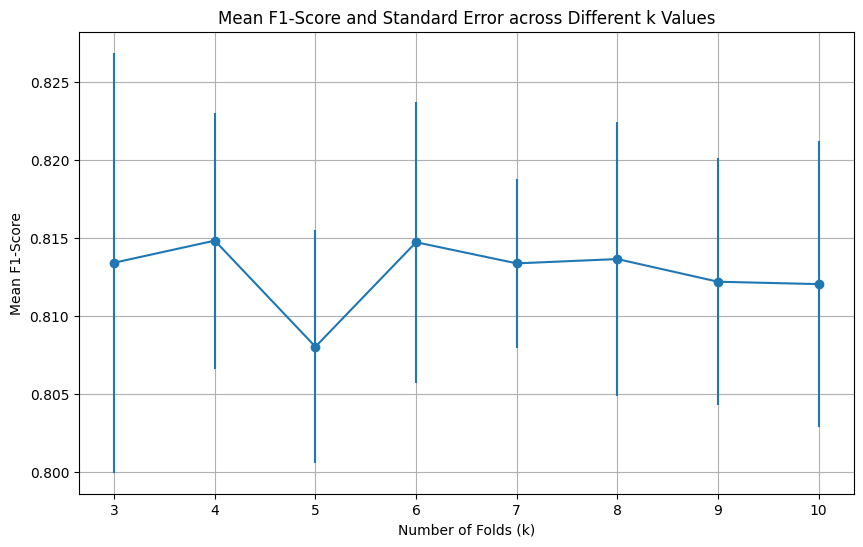

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20,
                           n_informative=15, n_redundant=5,
                           n_classes=2, random_state=42)

# Initialize logistic regression model
clf = LogisticRegression()

# List to store mean and std. err of F1-scores for each k
mean_f1_scores = []
std_err_f1_scores = []

# K values to use for k-fold CV
k_values = list(range(3, 11))

# Perform k-fold CV for each k and collect mean and std. err of F1-score
for k in k_values:
    f1_scores = cross_val_score(clf, X, y, cv=k, scoring='f1')
    mean_f1_scores.append(np.mean(f1_scores))
    std_err_f1_scores.append(np.std(f1_scores) / np.sqrt(k))

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(k_values, mean_f1_scores, yerr=std_err_f1_scores, marker='o', linestyle='-')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Mean F1-Score')
plt.title('Mean F1-Score and Standard Error across Different k Values')
plt.grid(True)
plt.show()

## Leave one out validation

In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import numpy as np

# Generate some example data
X, y = make_classification(n_samples=50, n_features=5, random_state=42)

# Initialize LeaveOneOut and the model
loo = LeaveOneOut()
model = LogisticRegression()

f1_scores = []

# Perform Leave-One-Out Cross-validation
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)
    f1_score = model.score(X_test, y_test)
    f1_scores.append(f1_score)

# Compute mean and standard error
mean_f1_score = np.mean(f1_scores)
stderr_f1_score = np.std(f1_scores) / np.sqrt(len(f1_scores))

print(f"Mean F1-Score: {mean_f1_score}")
print(f"Standard Error: {stderr_f1_score}")

Mean F1-Score: 0.94
Standard Error: 0.033585711247493336


# Exercise 2

There are many utilities in scikit-learn to handle complex k-fold cross-validation instances; you can read more [here](https://scikit-learn.org/stable/modules/cross_validation.html).  In the following, I'd like you to explore the API a little further.

1. Load the iris dataset (`from sklearn.datasets import load_iris`)
2. Label iris-setosa as class 1 and all others as class 0
3. Try using both KFold and StratifiedKFold classes to build classifiers.
4. Comparse performance across splits ranging from 3 - 10.
5. What is the impact of stratification?

In [ ]:
#Loading the dataset
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

#Label
y_new = np.where(y == 0, 1, 0)

#Using KFold and StratifiedKFold
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

kf = KFold(n_splits=5)
skf = StratifiedKFold(n_splits=5)

# Using KFold
kf_scores = cross_val_score(clf, X, y_new, cv=kf, scoring='accuracy')

# Using StratifiedKFold
skf_scores = cross_val_score(clf, X, y_new, cv=skf, scoring='accuracy')

#Impact of Stratification
from sklearn.metrics import accuracy_score

for k in range(3, 11):
    kf = KFold(n_splits=k)
    kf_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y_new[train_index], y_new[test_index]

        if len(np.unique(y_train)) > 1:
            clf.fit(X_train, y_train)
            kf_scores.append(accuracy_score(y_test, clf.predict(X_test)))

    if kf_scores:
        kf_mean_score = np.mean(kf_scores)
    else:
        kf_mean_score = np.nan

    skf = StratifiedKFold(n_splits=k)
    skf_scores = cross_val_score(clf, X, y_new, cv=skf, scoring='accuracy')

    print(f"K={k}, KFold mean accuracy: {kf_mean_score:.2f}, StratifiedKFold mean accuracy: {np.mean(skf_scores):.2f}")


K=3, KFold mean accuracy: 0.97, StratifiedKFold mean accuracy: 1.00
K=4, KFold mean accuracy: 1.00, StratifiedKFold mean accuracy: 1.00
K=5, KFold mean accuracy: 1.00, StratifiedKFold mean accuracy: 1.00
K=6, KFold mean accuracy: 1.00, StratifiedKFold mean accuracy: 1.00
K=7, KFold mean accuracy: 1.00, StratifiedKFold mean accuracy: 1.00
K=8, KFold mean accuracy: 1.00, StratifiedKFold mean accuracy: 1.00
K=9, KFold mean accuracy: 1.00, StratifiedKFold mean accuracy: 1.00
K=10, KFold mean accuracy: 1.00, StratifiedKFold mean accuracy: 1.00


One of the folds generated by the KFold method ends up containing only one class (0), and logistic regression can't train on data with only one class. This is why I have added a check before training the model to ensure that there is more than one class in the training data for that fold. Skip training for that fold if this is not the case.

What is the impact of stratification?
Stratification ensures that each fold is a good representative of the whole dataset. In the above case case, the difference is minimal, possibly due to the simplicity of the Iris dataset and the high performance of logistic regression on it.

Even though both KFold and StratifiedKFold gave high accuracy, the stratified version can be considered more reliable because it maintains the class distribution across folds.

# Resampling

In [ ]:
!pip install imblearn

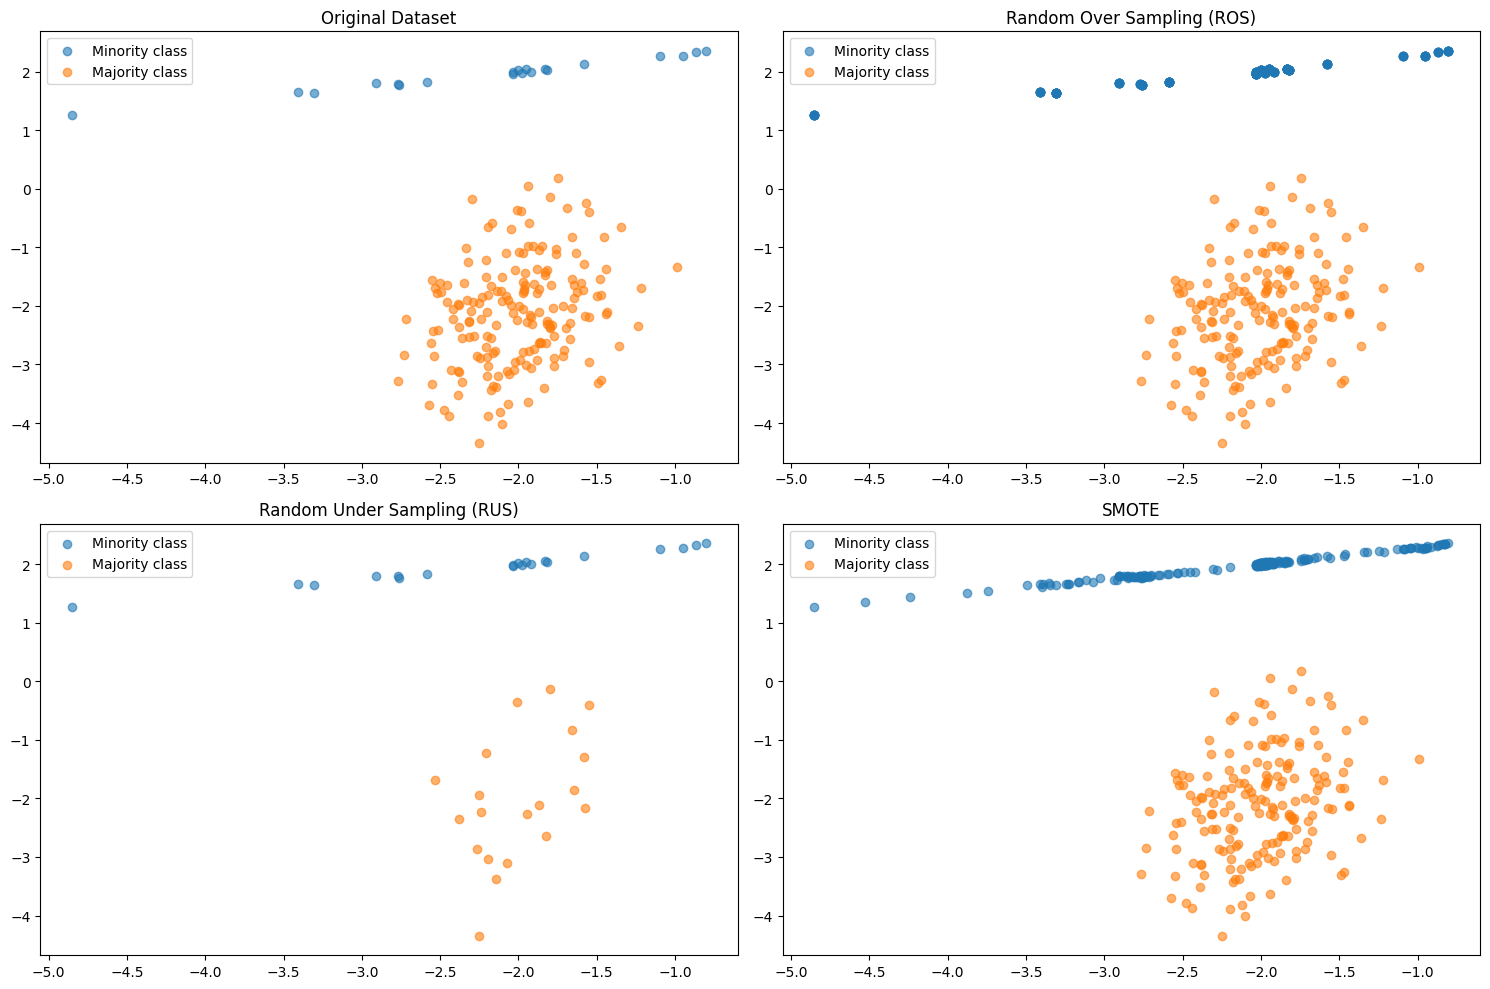

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification

# Create a 2D imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.1, 0.9], n_informative=2, n_redundant=0,
                           flip_y=0, n_features=2, n_clusters_per_class=1,
                           n_samples=200, random_state=10)

# Apply Random Over Sampler
ros = RandomOverSampler(random_state=42)
X_resampled_ros, y_resampled_ros = ros.fit_resample(X, y)

# Apply Random Under Sampler
rus = RandomUnderSampler(random_state=42)
X_resampled_rus, y_resampled_rus = rus.fit_resample(X, y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)

# Scatter plot code to visualize before and after effects of each technique
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes[0,0].scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Minority class', alpha=0.6)
axes[0,0].scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Majority class', alpha=0.6)
axes[0,0].set_title('Original Dataset')
axes[0,0].legend()

axes[0,1].scatter(X_resampled_ros[y_resampled_ros == 0][:, 0], X_resampled_ros[y_resampled_ros == 0][:, 1], label='Minority class', alpha=0.6)
axes[0,1].scatter(X_resampled_ros[y_resampled_ros == 1][:, 0], X_resampled_ros[y_resampled_ros == 1][:, 1], label='Majority class', alpha=0.6)
axes[0,1].set_title('Random Over Sampling (ROS)')
axes[0,1].legend()

axes[1,0].scatter(X_resampled_rus[y_resampled_rus == 0][:, 0], X_resampled_rus[y_resampled_rus == 0][:, 1], label='Minority class', alpha=0.6)
axes[1,0].scatter(X_resampled_rus[y_resampled_rus == 1][:, 0], X_resampled_rus[y_resampled_rus == 1][:, 1], label='Majority class', alpha=0.6)
axes[1,0].set_title('Random Under Sampling (RUS)')
axes[1,0].legend()

axes[1,1].scatter(X_resampled_smote[y_resampled_smote == 0][:, 0], X_resampled_smote[y_resampled_smote == 0][:, 1], label='Minority class', alpha=0.6)
axes[1,1].scatter(X_resampled_smote[y_resampled_smote == 1][:, 0], X_resampled_smote[y_resampled_smote == 1][:, 1], label='Majority class', alpha=0.6)
axes[1,1].set_title('SMOTE')
axes[1,1].legend()

plt.tight_layout()
plt.show()


## Exercise 3

Class rebalancing is tricky, and doesn't always yield the results you want.  In the following, try working with the `breast_cancer` dataset in scikit-learn to try to explore different resampling techniques.

1. Load and preprocess the data; check class distribution
2. Note that your logistic regression might not converge - why do you think that is?  Can you fix it?
3. Try random undersampling, random oversampling, and SMOTE.  Compare precision, recall, F1 scores, and crosstabs.  What works the best?

In [ ]:
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

# Checking the class distribution
print(f"Class distribution: {np.bincount(y)}")

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fitting the model
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train_scaled, y_train)
predictions = clf.predict(X_test_scaled)

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Initialize resampling methods and storage for metrics
resampling_methods = {'None': (X_train_scaled, y_train),
                      'Random Under Sampler': RandomUnderSampler(),
                      'Random Over Sampler': RandomOverSampler(),
                      'SMOTE': SMOTE()}

# Loop through resampling methods
for method_name, method in resampling_methods.items():
    if method_name == 'None':
        X_res, y_res = method
    else:
        X_res, y_res = method.fit_resample(X_train_scaled, y_train)

    # Fit the model
    clf.fit(X_res, y_res)

    # Make predictions
    predictions = clf.predict(X_test_scaled)

    # Calculate metrics
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)

    # Output the results
    print(f"Method: {method_name}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print("-----")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Class distribution: [212 357]
Method: None
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.979020979020979
Confusion Matrix:
[[41  2]
 [ 1 70]]
-----
Method: Random Under Sampler
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.979020979020979
Confusion Matrix:
[[41  2]
 [ 1 70]]
-----
Method: Random Over Sampler
Precision: 0.9857142857142858
Recall: 0.971830985915493
F1 Score: 0.9787234042553192
Confusion Matrix:
[[42  1]
 [ 2 69]]
-----
Method: SMOTE
Precision: 0.9859154929577465
Recall: 0.9859154929577465
F1 Score: 0.9859154929577465
Confusion Matrix:
[[42  1]
 [ 1 70]]
-----


The "Convergence Warning" suggests that the optimization algorithm used in logistic regression did not find an optimal solution within the default number of iterations. I tried increasing the max_iterations to 10000 but the error still remains. Implementing a different solver such as lbfgs might solve it.


Precision, Recall, and F1 Scores:

Without resampling: Precision = 0.9722, Recall = 0.9859, F1 = 0.9790

Random Under Sampling: Precision = 0.9722, Recall = 0.9859, F1 = 0.9790

Random Over Sampling: Precision = 0.9857, Recall = 0.9718, F1 = 0.9787

SMOTE: Precision = 0.9859, Recall = 0.9859, F1 = 0.9859

Crosstabs (Confusion Matrices): Each method has slightly different confusion matrices, with SMOTE producing the fewest false positives and false negatives.
What works the best?

SMOTE seems to perform the best among the methods tried, as it provides the highest precision, recall, and F1 score.

# Evaluating clusters

## The Elbow Method

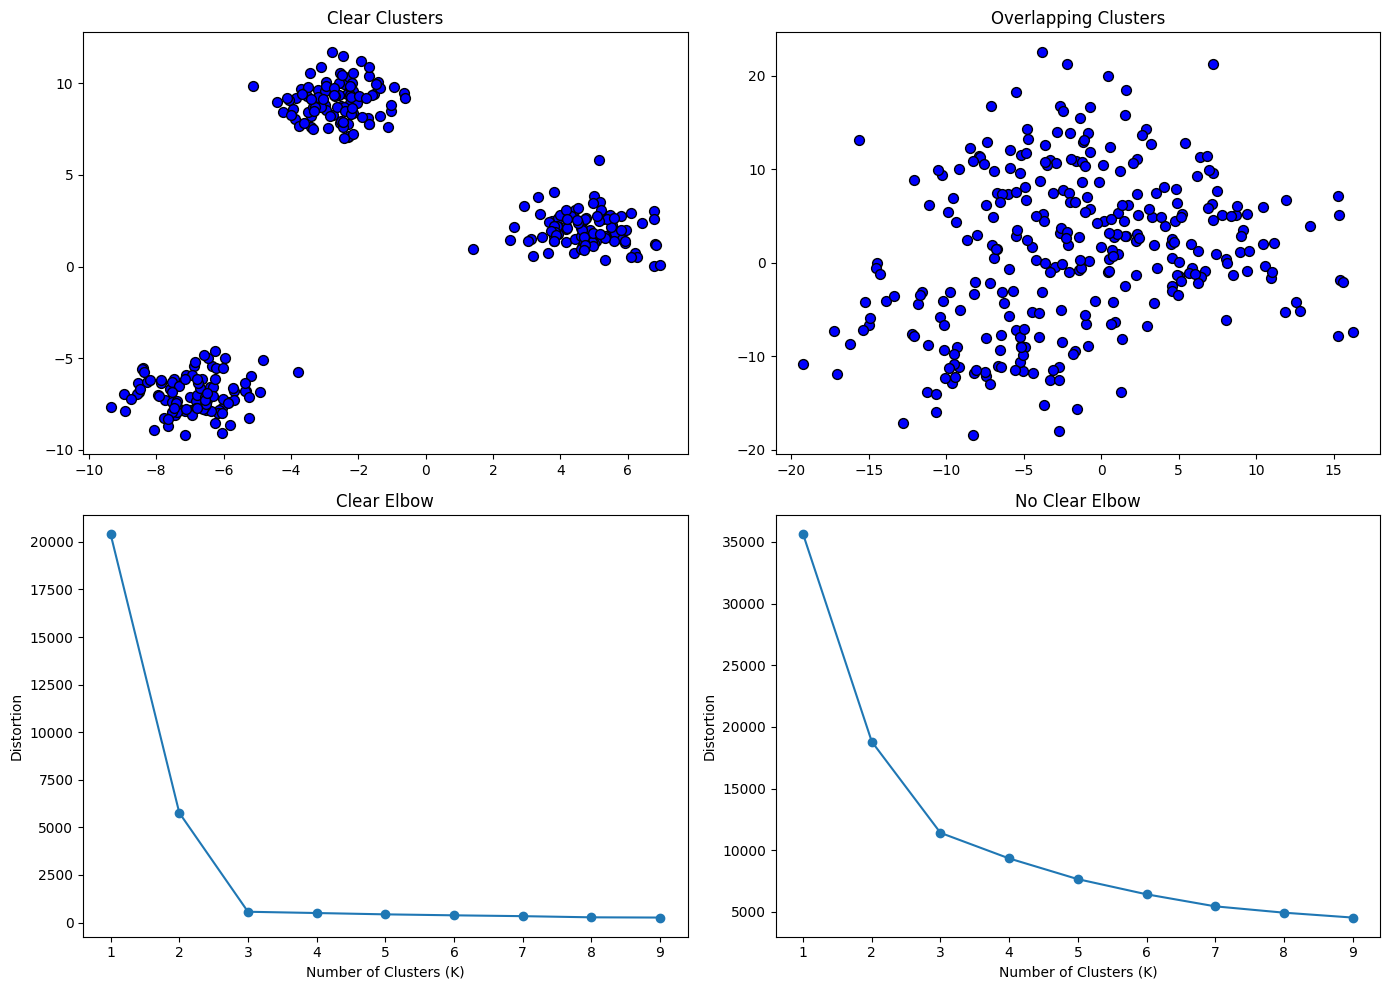

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data with 3 clear clusters
X1, y1 = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.0)

# Generate synthetic data with no clear clusters (high standard deviation)
X2, y2 = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=5)

# Function to apply KMeans and plot elbow graph
def plot_elbow(ax, X, title):
    distortions = []
    K = range(1, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k,n_init='auto')
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

    ax.plot(K, distortions, marker='o')
    ax.set_title(title)
    ax.set_xlabel('Number of Clusters (K)')
    ax.set_ylabel('Distortion')

# Function to plot data
def plot_data(ax, X, title):
    ax.scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolor='black', s=50)
    ax.set_title(title)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot data and elbow graphs
plot_data(axes[0, 0], X1, 'Clear Clusters')
plot_data(axes[0, 1], X2, 'Overlapping Clusters')
plot_elbow(axes[1, 0], X1, 'Clear Elbow')
plot_elbow(axes[1, 1], X2, 'No Clear Elbow')

plt.tight_layout()
plt.show()

## Silhouette analysis

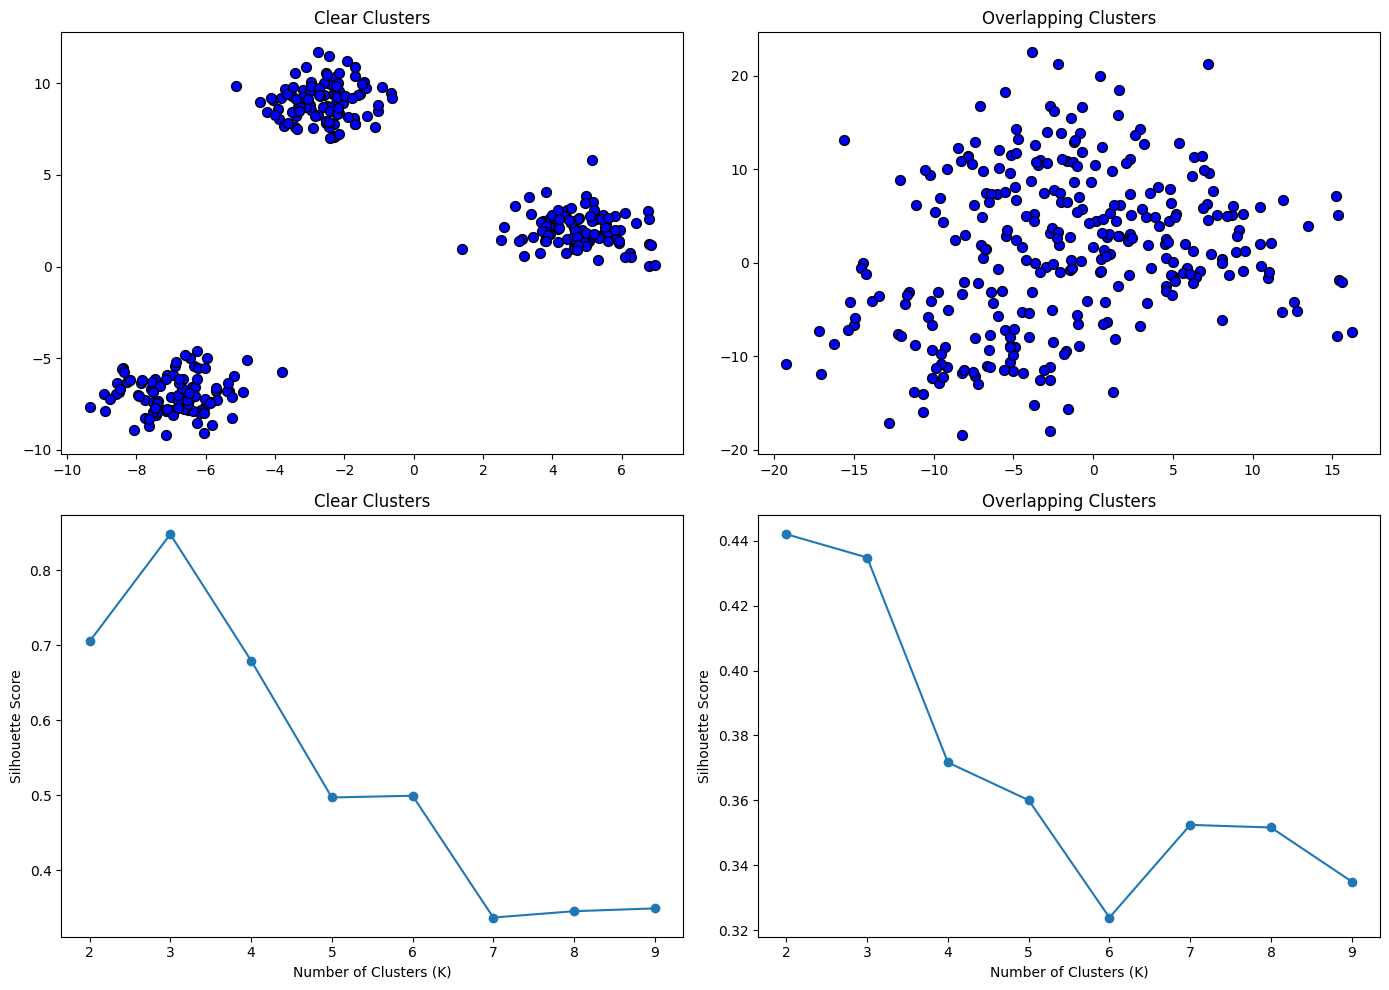

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate synthetic data with 3 clear clusters
X1, y1 = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.0)

# Generate synthetic data with no clear clusters (high standard deviation)
X2, y2 = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=5)

# Function to apply KMeans and plot silhouette scores
def plot_silhouette(ax, X, title):
    silhouette_scores = []
    K = range(2, 10)  # silhouette_score requires at least 2 clusters
    for k in K:
        kmeans = KMeans(n_clusters=k,n_init='auto')
        kmeans.fit(X)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))

    ax.plot(K, silhouette_scores, marker='o')
    ax.set_title(title)
    ax.set_xlabel('Number of Clusters (K)')
    ax.set_ylabel('Silhouette Score')

# Function to plot data
def plot_data(ax, X, title):
    ax.scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolor='black', s=50)
    ax.set_title(title)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot data and silhouette graphs
plot_data(axes[0, 0], X1, 'Clear Clusters')
plot_data(axes[0, 1], X2, 'Overlapping Clusters')
plot_silhouette(axes[1, 0], X1, 'Clear Clusters')
plot_silhouette(axes[1, 1], X2, 'Overlapping Clusters')

plt.tight_layout()
plt.show()

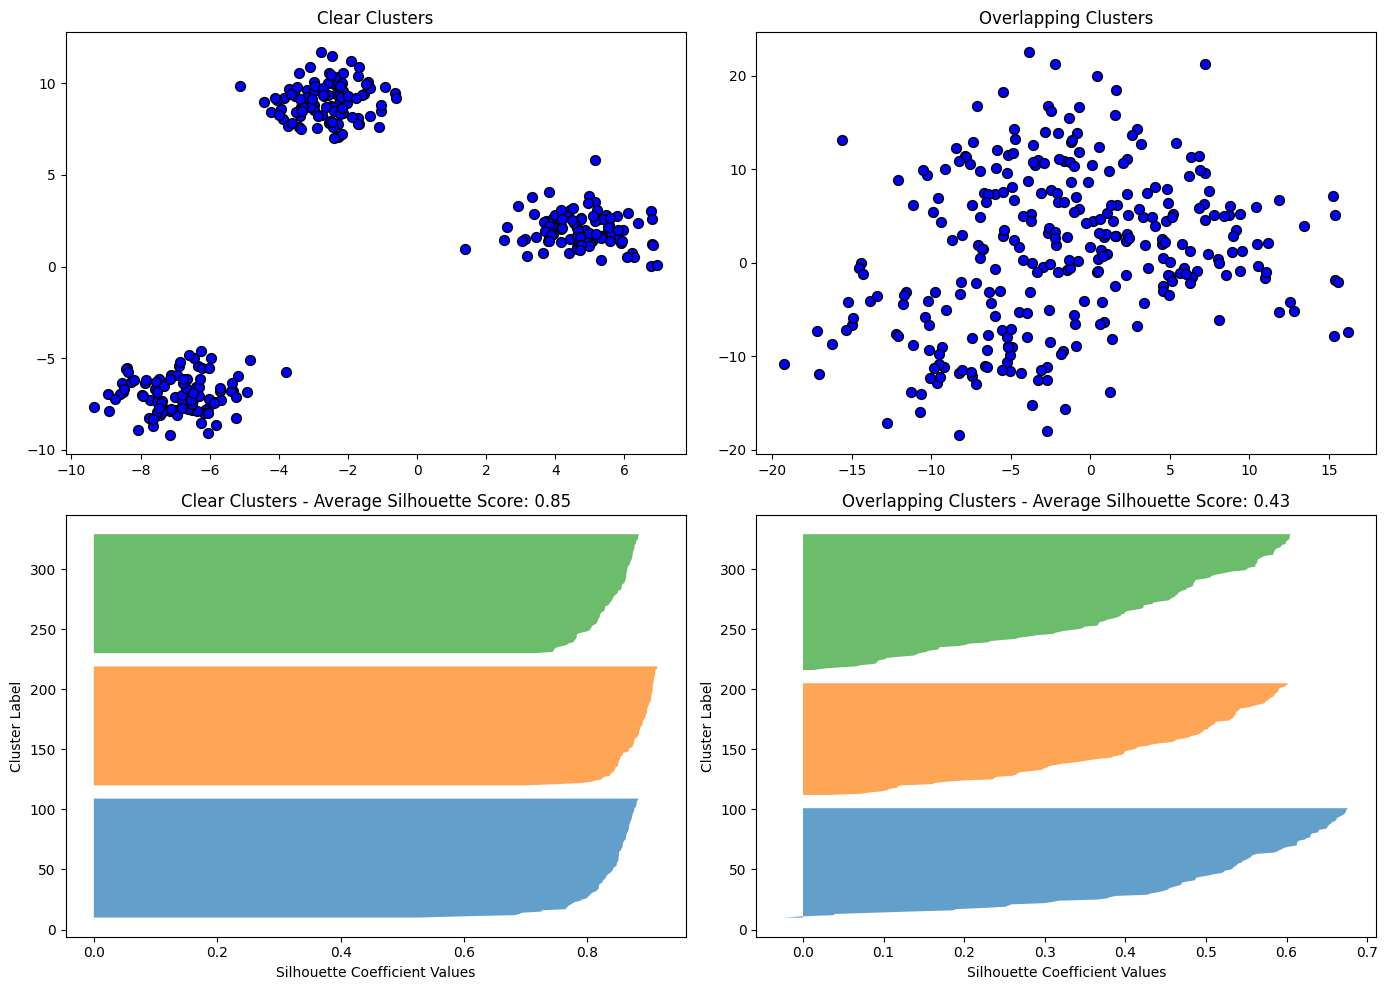

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

# Function to apply KMeans and plot silhouette graph
def plot_silhouette(ax, X, title):
    # List to store average silhouette scores for different number of clusters
    avg_silhouette_scores = []
    K = [3]  # Start from 2 as silhouette score requires at least 2 clusters

    for k in K:
        kmeans = KMeans(n_clusters=k,n_init='auto')
        cluster_labels = kmeans.fit_predict(X)

        # Calculate the silhouette score for the current number of clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        avg_silhouette_scores.append(silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        # Plot silhouette scores for each cluster
        y_lower = 10  # For space between silhouette plots of individual clusters
        for i in range(k):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.7)
            y_lower = y_upper + 10

    ax.set_title(f"{title} - Average Silhouette Score: {silhouette_avg:.2f}")
    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster Label")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot data and silhouette graphs
plot_data(axes[0, 0], X1, 'Clear Clusters')
plot_data(axes[0, 1], X2, 'Overlapping Clusters')
plot_silhouette(axes[1, 0], X1, 'Clear Clusters')
plot_silhouette(axes[1, 1], X2, 'Overlapping Clusters')

plt.tight_layout()
plt.show()

## David-Bouldin Analysis

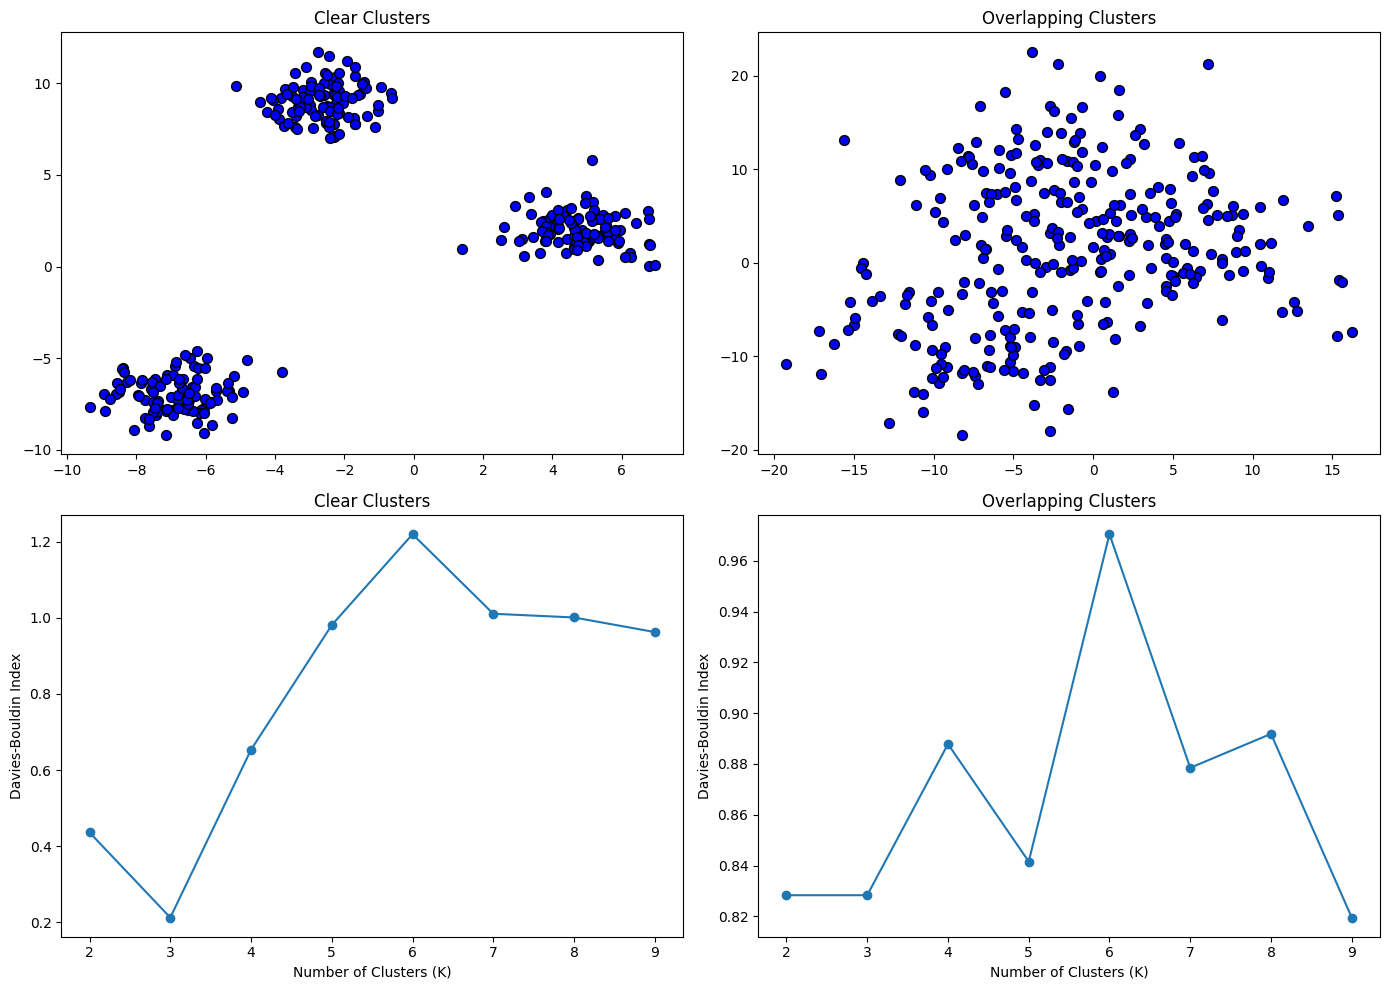

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Generate synthetic data with 3 clear clusters
X1, y1 = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.0)

# Generate synthetic data with no clear clusters (high standard deviation)
X2, y2 = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=5)

# Function to apply KMeans and plot silhouette scores
def plot_davies_bouldin(ax, X, title):
    db_scores = []
    K = range(2, 10)  # Davies-Bouldin is undefined for n_clusters=1
    for k in K:
        kmeans = KMeans(n_clusters=k,n_init='auto')
        kmeans.fit(X)
        labels = kmeans.labels_
        db_score = davies_bouldin_score(X, labels)
        db_scores.append(db_score)

    ax.plot(K, db_scores, marker='o')
    ax.set_title(title)
    ax.set_xlabel('Number of Clusters (K)')
    ax.set_ylabel('Davies-Bouldin Index')

# Function to plot data
def plot_data(ax, X, title):
    ax.scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolor='black', s=50)
    ax.set_title(title)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot data and silhouette graphs
plot_data(axes[0, 0], X1, 'Clear Clusters')
plot_data(axes[0, 1], X2, 'Overlapping Clusters')
plot_davies_bouldin(axes[1, 0], X1, 'Clear Clusters')
plot_davies_bouldin(axes[1, 1], X2, 'Overlapping Clusters')

plt.tight_layout()
plt.show()

## Visualizing High Dimensional Clusters

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Generate synthetic data with 3 clusters in 10 dimensions
X, y = make_blobs(n_samples=300, centers=3, n_features=10, random_state=42, cluster_std=1.0)
pd.DataFrame(X).head(5)

,0,1,2,3,4,5,6,7,8,9
0,-8.555764,10.524902,5.557886,-6.164032,-7.469205,-6.546831,-4.223189,1.274789,-0.050791,-2.779733
1,-1.351087,9.805949,5.263999,2.601515,-6.891874,-7.777364,-8.762523,6.646361,2.997420,4.014394
2,-8.969156,11.455693,6.669647,-6.481221,-6.546397,-4.957033,-4.561119,-0.304063,-1.843843,-5.128746
3,-3.101592,8.150295,4.688400,1.142220,-6.609170,-6.930348,-9.077276,6.415959,1.445529,4.916843
4,1.336437,-6.571731,-4.485726,-2.069576,-1.422714,5.540726,-5.965605,-0.717499,2.589116,-9.584205


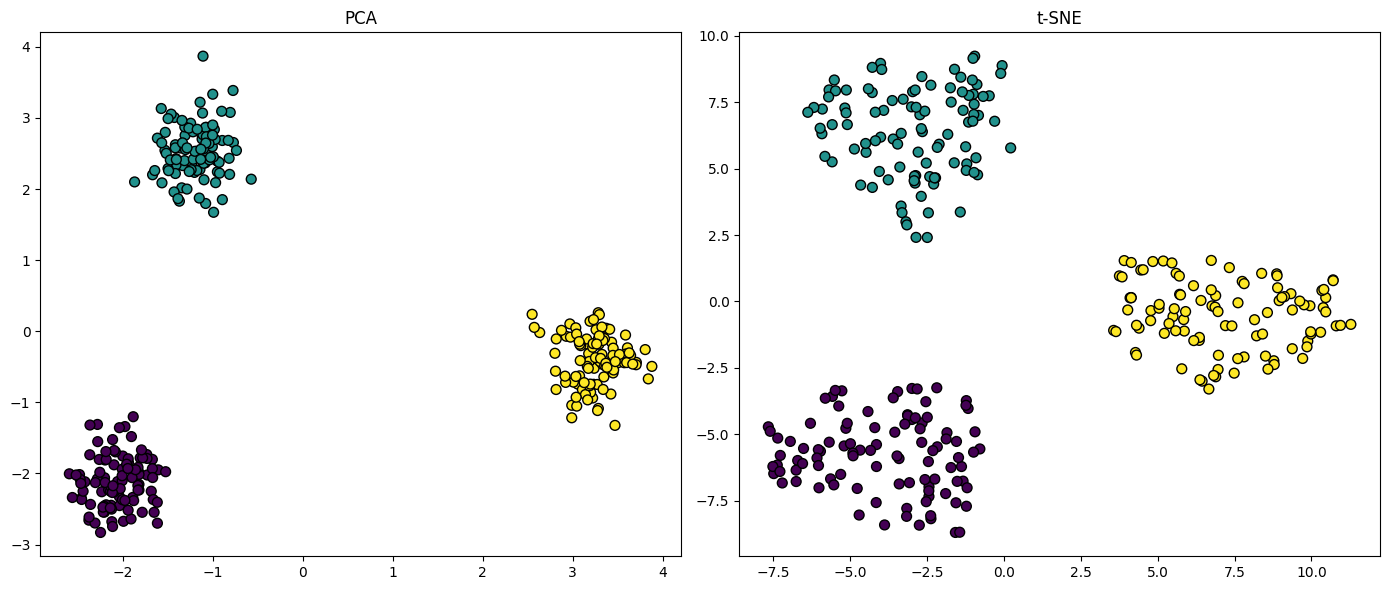

In [ ]:


# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3,n_init='auto')
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Apply PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply t-SNE for dimensionality reduction to 2D
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X_scaled)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot original data in 2D PCA space
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, marker='o', edgecolor='black', s=50)
axes[0].set_title('PCA')

# Plot original data in 2D t-SNE space
axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, marker='o', edgecolor='black', s=50)
axes[1].set_title('t-SNE')

plt.tight_layout()
plt.show()

## Adjusted Rand Index

You can sample ARI to get an estimated p-value as follows

In [ ]:
from sklearn.metrics import adjusted_rand_score
import numpy as np

def perm_test_ari(true_labels, pred_labels, n_perm=1000):
    actual_ari = adjusted_rand_score(true_labels, pred_labels)
    perm_ari = []

    for i in range(n_perm):
        perm_labels = np.random.permutation(pred_labels)
        perm_ari.append(adjusted_rand_score(true_labels, perm_labels))

    p_value = (np.sum(np.array(perm_ari) >= actual_ari) + 1) / (n_perm + 1)

    return actual_ari, p_value

# Example usage
true_labels = [0, 0, 1, 1, 2, 2]
pred_labels = [0, 0, 1, 2, 2, 2]  # some clustering result

actual_ari, p_value = perm_test_ari(true_labels, pred_labels)

print(f"Actual ARI: {actual_ari}")
print(f"P-value: {p_value}")

Actual ARI: 0.4444444444444444
P-value: 0.2077922077922078


## Stability Analysis

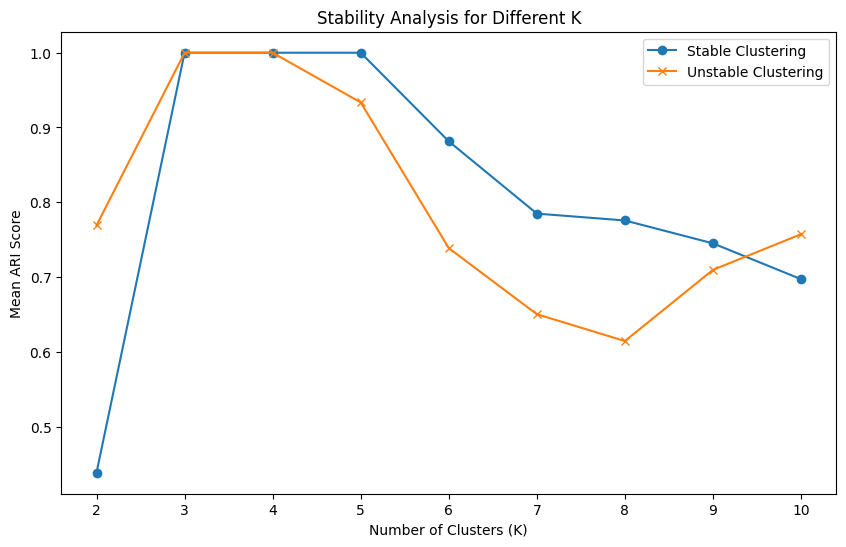

In [ ]:
import matplotlib.pyplot as plt


def create_data(centers, std_dev):
    X, y = make_blobs(n_samples=300, centers=centers, cluster_std=std_dev, random_state=42)
    return X

# Function to run KMeans with different K and check stability
def check_stability_for_diff_K(X, K_values, n_runs=5):
    ari_scores = []

    for k in K_values:
        temp_ari_scores = []
        prev_labels = None

        for i in range(n_runs):
            kmeans = KMeans(n_clusters=k, random_state=i, n_init="auto")
            kmeans.fit(X)
            labels = kmeans.labels_

            if prev_labels is not None:
                ari = adjusted_rand_score(prev_labels, labels)
                temp_ari_scores.append(ari)

            prev_labels = labels

        mean_ari = np.mean(temp_ari_scores)
        ari_scores.append(mean_ari)

    return ari_scores

# K values to test
K_values = range(2, 11)

X_stable = create_data(centers=5, std_dev=1.0)
X_unstable = create_data(centers=5, std_dev=2.0)

# Check stability for different K
stable_scores = check_stability_for_diff_K(X_stable, K_values)
unstable_scores = check_stability_for_diff_K(X_unstable, K_values)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(K_values, stable_scores, marker='o', label='Stable Clustering')
plt.plot(K_values, unstable_scores, marker='x', label='Unstable Clustering')
plt.title('Stability Analysis for Different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Mean ARI Score')
plt.legend()
plt.show()

# Exercise 4

Scikit learn provides a dataset of text documents from 20 Usenet newsgroups.  I've provided code to load the dataset and provide a scatter plot.  Your job is to explore it to discover the natural clusters, using the techniques offered above.

1. Make sure to try visualizing with TSNE, or possibly UMAP to see how things work out.
2. Try different k-values, evaluating each of the metrics offered above.
3. Visualize your different clusterings.
4. How many clusters make sense to you?  Perform a stability analysis over different values of k.
4. Inspect the newgroup labels; does it make sense that some newgroups would overlap more in terms of content?


In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

newsgroups = fetch_20newsgroups(subset='all',remove=('headers', 'footers', 'quotes'))
# Note that newsgroups.data has the text data
# newsgroups.target has the newsgroups
# newsgroups.targetlabels has the names of the newsgroups

# Note - the restriction to 2000 features is necessary for low memory environments, and shouldn't impact performance much
vectorizer = TfidfVectorizer(stop_words='english',max_features=2000)
X = vectorizer.fit_transform(newsgroups.data)

In [ ]:
X

<18846x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 622760 stored elements in Compressed Sparse Row format>

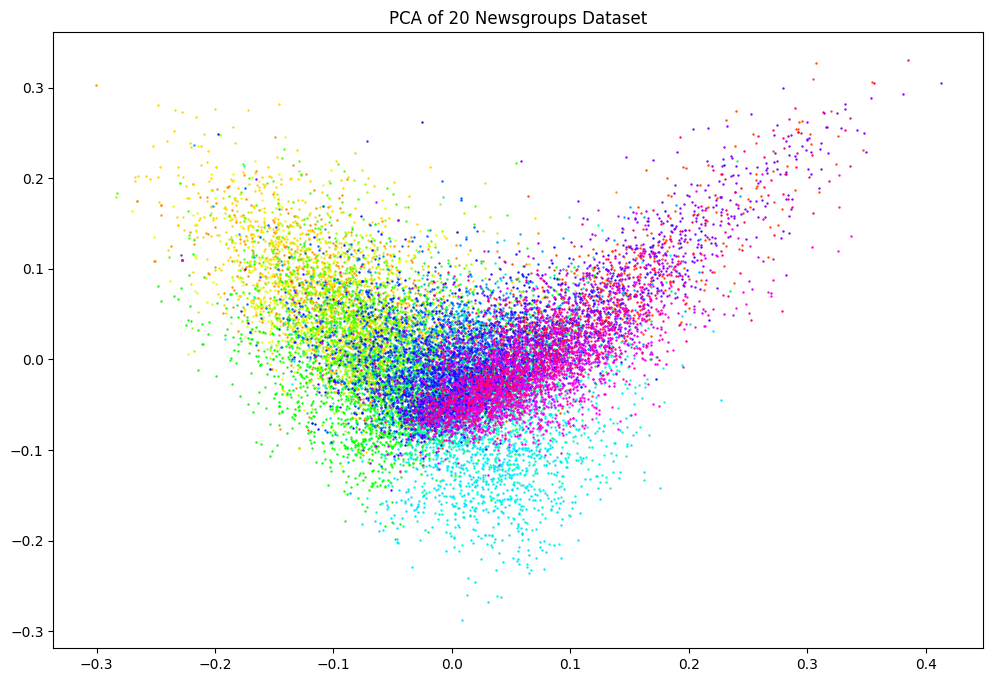

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_r = pca.fit_transform(X.toarray())

# Labels
labels = newsgroups.target
target_names = newsgroups.target_names

# Generate a color palette with as many colors as there are unique labels
palette = sns.color_palette('hsv', len(target_names))

plt.figure(figsize=(12, 8))

for i, target_name in enumerate(target_names):
    plt.scatter(X_r[labels == i, 0], X_r[labels == i, 1], color=palette[i], s=.5)

plt.title('PCA of 20 Newsgroups Dataset')
plt.show()

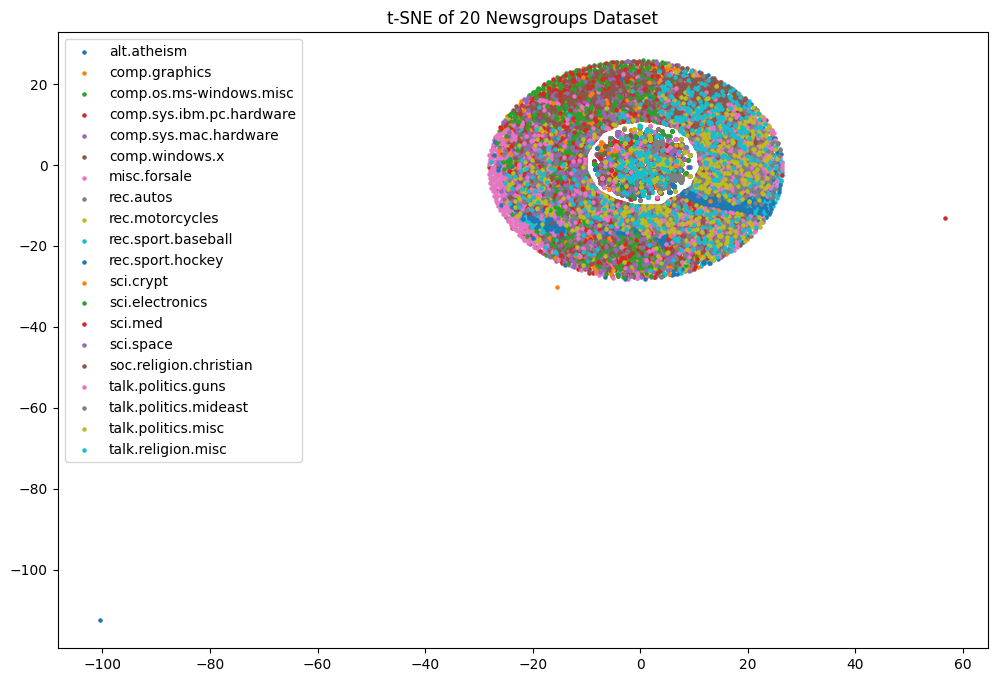

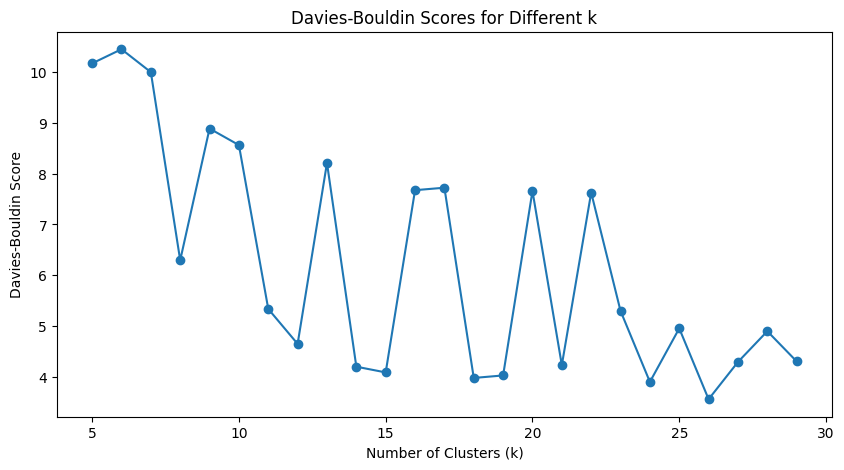

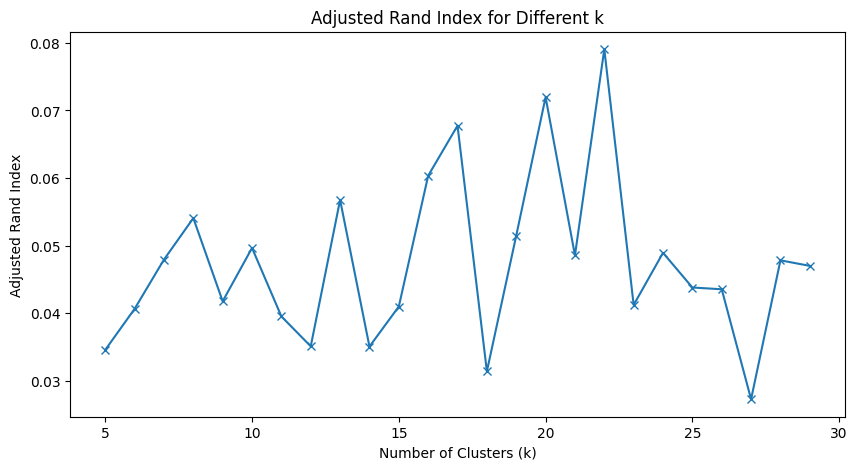

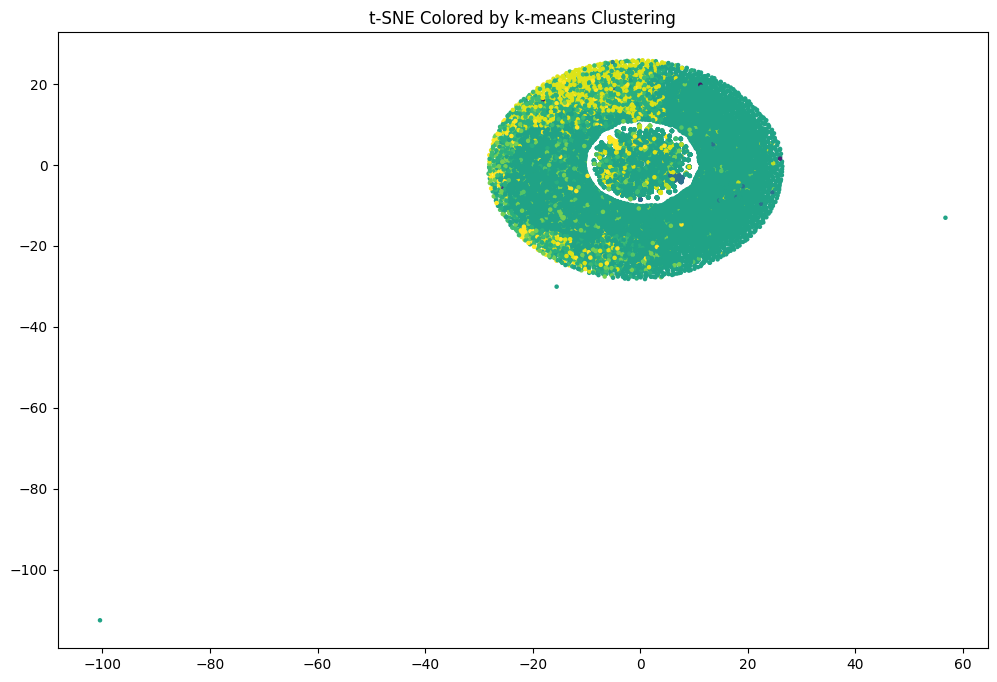

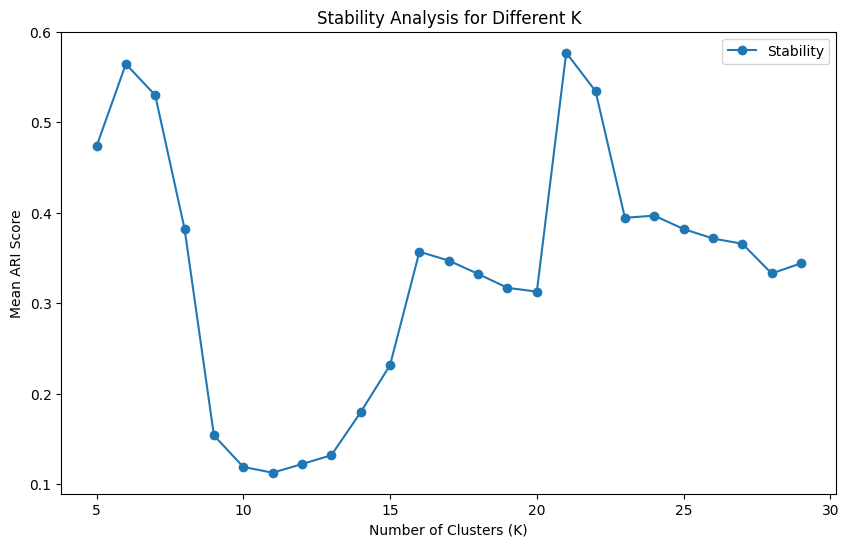

Cluster 11: [('soc.religion.christian', 944), ('rec.sport.hockey', 937), ('rec.sport.baseball', 899)]
Cluster 13: [('comp.sys.ibm.pc.hardware', 205), ('comp.sys.mac.hardware', 119), ('comp.os.ms-windows.misc', 80)]
Cluster 7: [('talk.politics.mideast', 123)]
Cluster 19: [('comp.sys.ibm.pc.hardware', 193), ('comp.sys.mac.hardware', 126), ('misc.forsale', 90)]
Cluster 17: [('talk.politics.mideast', 60), ('talk.religion.misc', 8), ('alt.atheism', 4)]
Cluster 18: [('comp.os.ms-windows.misc', 476), ('comp.windows.x', 420), ('comp.graphics', 217)]
Cluster 12: [('comp.graphics', 246), ('comp.sys.mac.hardware', 181), ('comp.windows.x', 179)]
Cluster 15: [('misc.forsale', 101), ('sci.med', 99), ('comp.graphics', 53)]
Cluster 14: [('rec.autos', 26), ('sci.space', 24), ('sci.electronics', 20)]
Cluster 4: [('sci.space', 1)]
Cluster 10: [('comp.sys.mac.hardware', 1)]
Cluster 5: [('comp.windows.x', 1)]
Cluster 0: [('misc.forsale', 1)]
Cluster 2: [('rec.sport.baseball', 1)]
Cluster 1: [('soc.religion

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import davies_bouldin_score, adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# Fetch data and vectorize it
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
vectorizer = TfidfVectorizer(stop_words='english', max_features=2000)
X = vectorizer.fit_transform(newsgroups.data)

# Labels
labels = newsgroups.target
target_names = newsgroups.target_names

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X.toarray())

# Plot
plt.figure(figsize=(12, 8))
for i, target_name in enumerate(target_names):
    plt.scatter(X_tsne[labels == i, 0], X_tsne[labels == i, 1], s=5, label=target_name)
plt.legend()
plt.title('t-SNE of 20 Newsgroups Dataset')
plt.show()


K_values = range(5, 30)  # Choose a suitable range for k-values

db_scores = []  # Davies-Bouldin Scores
ari_scores = []  # Adjusted Rand Index Scores

for k in K_values:
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(X)
    kmeans_labels = kmeans.labels_
    db_score = davies_bouldin_score(X.toarray(), kmeans_labels)
    ari_score = adjusted_rand_score(labels, kmeans_labels)
    db_scores.append(db_score)
    ari_scores.append(ari_score)

# Plotting Davies-Bouldin Scores
plt.figure(figsize=(10, 5))
plt.plot(K_values, db_scores, marker='o')
plt.title('Davies-Bouldin Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.show()

# Plotting Adjusted Rand Index Scores
plt.figure(figsize=(10, 5))
plt.plot(K_values, ari_scores, marker='x')
plt.title('Adjusted Rand Index for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Adjusted Rand Index')
plt.show()

# Here, I'm using k=20 as an example
kmeans = KMeans(n_clusters=20, n_init='auto')
kmeans.fit(X)
kmeans_labels = kmeans.labels_

# t-SNE plot colored by k-means cluster label
plt.figure(figsize=(12, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, s=5)
plt.title('t-SNE Colored by k-means Clustering')
plt.show()

# Function to run KMeans with different K and check stability
def check_stability_for_diff_K(X, K_values, n_runs=5):
    ari_scores = []

    for k in K_values:
        temp_ari_scores = []
        prev_labels = None

        for i in range(n_runs):
            kmeans = KMeans(n_clusters=k, random_state=i, n_init="auto")
            kmeans.fit(X)
            labels = kmeans.labels_

            if prev_labels is not None:
                ari = adjusted_rand_score(prev_labels, labels)
                temp_ari_scores.append(ari)

            prev_labels = labels

        mean_ari = np.mean(temp_ari_scores)
        ari_scores.append(mean_ari)

    return ari_scores

# K values to test, for example from 5 to 30
K_values = range(5, 30)

# Check stability for different K
stability_scores = check_stability_for_diff_K(X, K_values)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(K_values, stability_scores, marker='o', label='Stability')
plt.title('Stability Analysis for Different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Mean ARI Score')
plt.legend()
plt.show()


cluster_to_newsgroups = {}
for cluster_id, newsgroup_id in zip(kmeans_labels, newsgroups.target):
    if cluster_id not in cluster_to_newsgroups:
        cluster_to_newsgroups[cluster_id] = []
    cluster_to_newsgroups[cluster_id].append(newsgroups.target_names[newsgroup_id])

# Most common newsgroups in each cluster
for cluster_id, newsgroup_list in cluster_to_newsgroups.items():
    most_common = Counter(newsgroup_list).most_common(3)
    print(f"Cluster {cluster_id}: {most_common}")